In [3]:
import pandas as pd

In [4]:
sensus ={
    'tinggi':[150,170,183,191,155,163,180,158,178],
    'berat':[64,68,84,80,49,59,67,54,67],
    'jk': ['pria','pria','pria','pria','pria','pria','wanita','wanita','wanita']
}

sensus_df=pd.DataFrame(sensus)

sensus_df

,tinggi,berat,jk
0,150,64,pria
1,170,68,pria
2,183,84,pria
3,191,80,pria
4,155,49,pria
5,163,59,pria
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


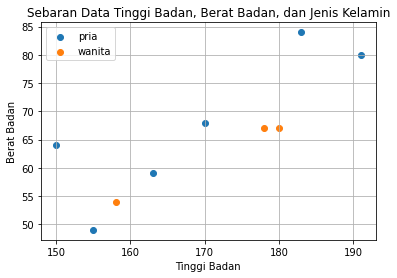

In [5]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
for jk,d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'],d['berat'],label=jk)

plt.legend(loc='upper left')
plt.title("Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin")
plt.xlabel('Tinggi Badan')
plt.ylabel("Berat Badan")
plt.grid(True)
plt.show()

In [6]:
import numpy as np

X_train=np.array(sensus_df[['tinggi','berat']])
y_train=np.array(sensus_df[['jk']])

print(f'X_train :\n {X_train}')
print(f'y_train : \n {y_train}')

X_train :
 [[150  64]
 [170  68]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]
y_train : 
 [['pria']
 ['pria']
 ['pria']
 ['pria']
 ['pria']
 ['pria']
 ['wanita']
 ['wanita']
 ['wanita']]


In [7]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
print(f'y_train : \n {y_train}')

y_train : 
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [8]:
y_train=y_train.flatten()
y_train

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [9]:
from sklearn.neighbors import KNeighborsClassifier

K=3
model=KNeighborsClassifier(n_neighbors=K)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
tinggi_badan=155
berat_badan=70

X_new=np.array([tinggi_badan,berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

In [11]:
y_new=model.predict(X_new)
y_new

array([0])

In [12]:
lb.inverse_transform(y_new)

array(['pria'], dtype='<U6')

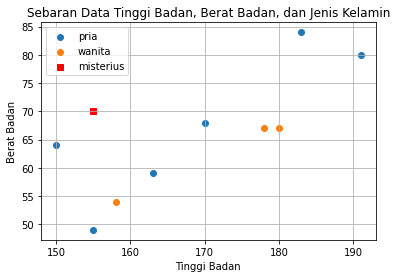

In [13]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
for jk,d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'],d['berat'],label=jk)

plt.scatter(tinggi_badan,berat_badan,marker='s',color='red',label='misterius')

plt.legend(loc='upper left')
plt.title("Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin")
plt.xlabel('Tinggi Badan')
plt.ylabel("Berat Badan")
plt.grid(True)
plt.show()

In [14]:
misterius=np.array([tinggi_badan,berat_badan])

misterius

array([155,  70])

In [15]:
X_train

array([[150,  64],
       [170,  68],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]])

In [16]:
from scipy.spatial.distance import euclidean

data_jarak=[euclidean(misterius,d) for d in X_train]

data_jarak

[7.810249675906654,
 15.132745950421556,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [17]:
sensus_df['jarak']=data_jarak

sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,150,64,pria,7.810250
5,163,59,pria,13.601471
1,170,68,pria,15.132746
7,158,54,wanita,16.278821
4,155,49,pria,21.000000
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [18]:
X_test=np.array([[168,65],[180,95],[160,52],[169,67]])
y_test=lb.transform(np.array(['pria'])).flatten()

print(f'X_test :\n {X_test}')
print(f'y_test : \n {y_test}')

X_test :
 [[168  65]
 [180  95]
 [160  52]
 [169  67]]
y_test : 
 [0]


In [19]:
y_pred=model.predict(X_new)
y_pred

print(y_pred)

[0]


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1-score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [21]:
from sklearn.metrics import classification_report

cls_report=classification_report(y_test,y_pred)

print(f'Classification Report: {cls_report}')

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [22]:
from sklearn.metrics import matthews_corrcoef

mcc=matthews_corrcoef(y_test,y_pred)

print(f'MCC : {mcc}')

MCC : 0.0
